In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF, Sinc

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
m, n, r = 100, 100, 50
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


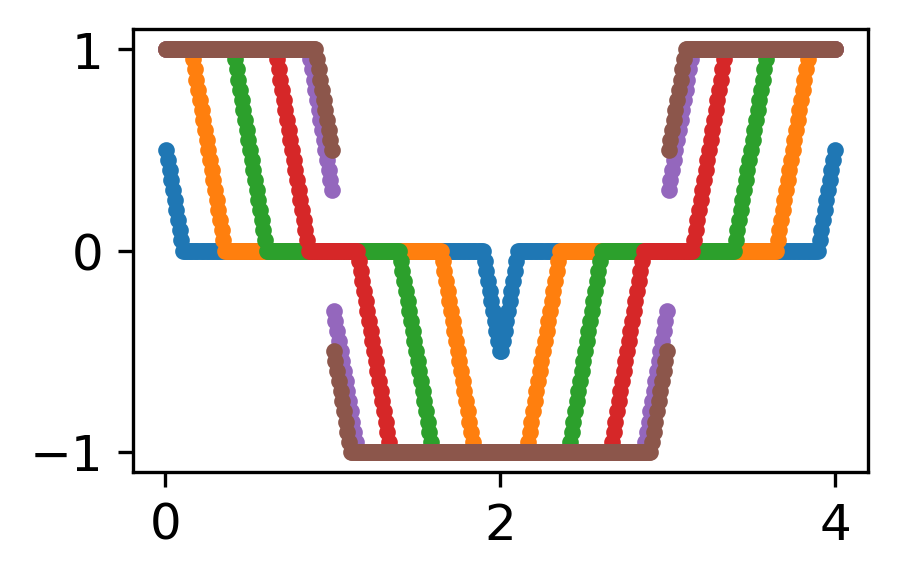

In [5]:
u_lr = LinearRamp(epsilon=.1)

u_k = u_lr
X = u_k(x(), mu())

#fixit = X[0, :] > 0.0
#X[:, fixit] -= X[None, 0, fixit]
#X[:, fixit] /= X[:, fixit].max(axis=0)
#fixit = X[:, -1] > 0.0
#X[fixit, :] -= X[fixit, None, -1]
#X[fixit, :] /= X[fixit, :].max(axis=1)[:, None]

X__ = np.r_[X, X[::-1, :]]
X____ = np.r_[X__, -X__]
__X____ = np.c_[X____, -X____[:, ::-1]]
____X____ = np.c_[__X____, __X____[::-1]]
xx = np.r_[x(), x()+1]
xxxx = np.r_[x(), x()+1, x()+2, x()+3]

#for i in [0, 25, 50, 75, 95, 99]:
#    plt.plot(xxxx, X____[:, i], ".")
#plt.show()

for i in [0, 25, 50, 75, 95, 99]:
    plt.plot(xxxx, ____X____[i, :], ".")
plt.show()

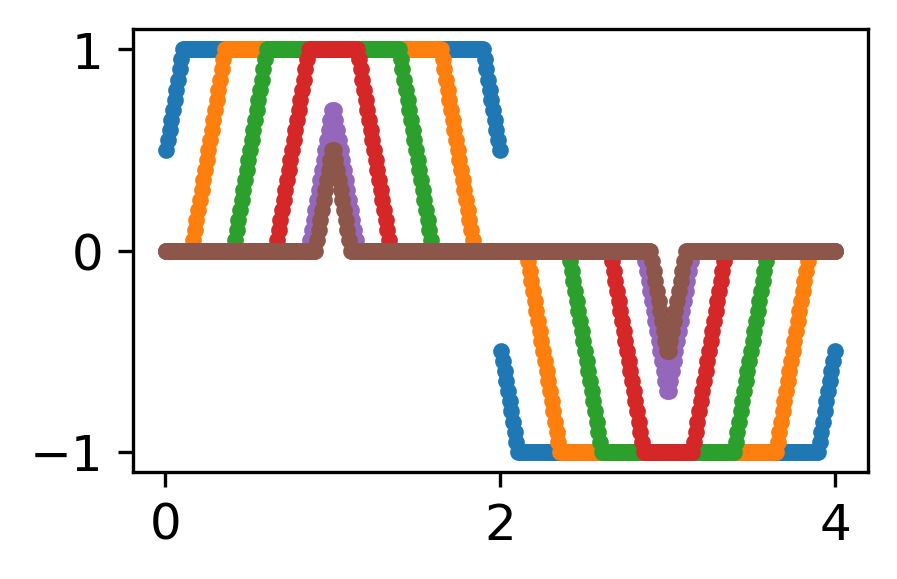

In [6]:
for i in [0, 25, 50, 75, 95, 99]:
    plt.plot(xxxx, X____[:, i], ".")
plt.show()


(200,) (400,)
(200,) (400,)
(200,) (400,)
(200,) (400,)
(200,) (400,)
(200,) (400,)


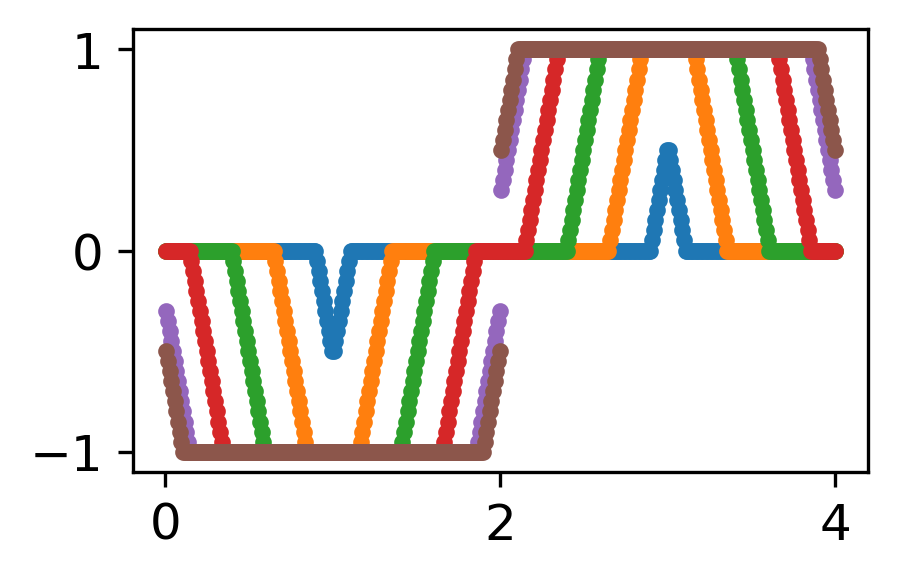

In [7]:
for i in [0, 25, 50, 75, 95, 99]:
    print(xx.shape, ____X____[:, i+100].shape)
    plt.plot(xxxx, ____X____[:, i+100], ".")
plt.show()

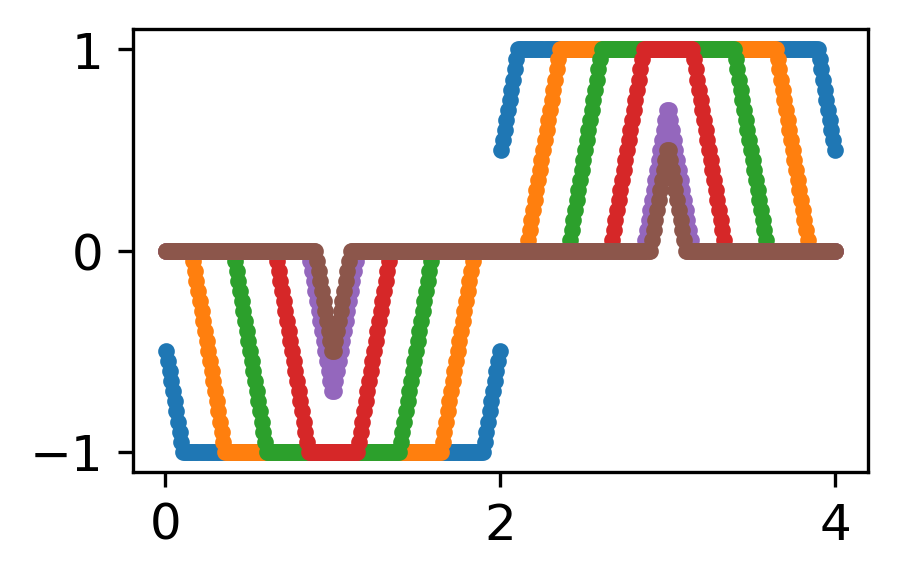

In [8]:
for i in [0, 25, 50, 75, 95, 99]:
    plt.plot(xxxx, ____X____[:, i+200], ".")
plt.show()

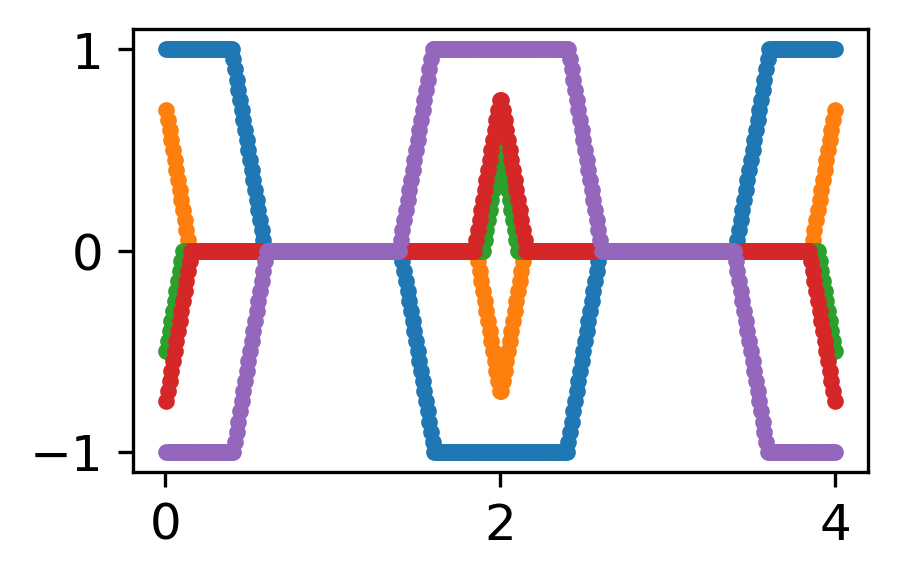

In [9]:
for i in [150, 195, 200, 205, 250]:
    plt.plot(xxxx, ____X____[i, :], ".")
plt.show()

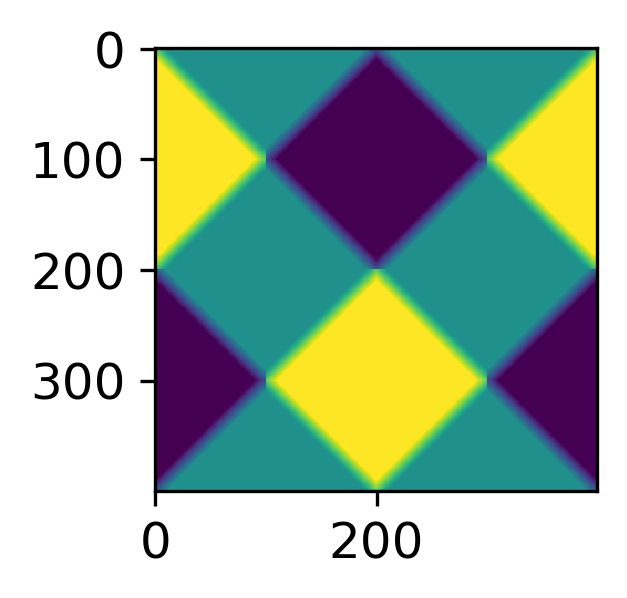

In [10]:
fig, ax = plt.subplots()
plt.imshow(____X____, interpolation="nearest")
plt.show()

In [11]:
x = Domain([0, 4], m)
mu = Domain([0, 4], n)
X = x()*mu() % 2